# Clean and dirty setup on qiskit 
This notebook contains an example of how you can use the provided code in `reproduce_figure_5_data.py` to both recreate the depolarizing noise version of the clean and dirty setup and plot the results. A small precomputed example for 4 qubits to 100 layers is provided in the results folder and can be visualized here.
### Requirements
Pandas (1.3.3), seaborn (0.11.2), numpy (1.23.4), qiskit (0.22.1), mthree (1.1.0.dev0)
## Running 
The function `figure_5_data` allows a quick way to generate data similar to the paper. We used  a proprietary LANL code which sadly cannot be shared, but the eager reader is more than welcome to use and modify the provided code which is spread between `reproduce_figure_5_data.py`, `hamiltonian_utils.py`, `gradient_utils.py` and `circuit_utils.py`. 


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from reproduce_figure_5_data import figure_5_data

/home/danielb/miniconda3/envs/qiskit/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [16]:
if True:  # Set to true if you would like to run something different
    df = figure_5_data(
        max_layers=50,
        layer_step_size=50,
        num_qubits=4,
        sim_seeds=[55,66,77,88,99],
        single_qubit_depol_prob=2.425 * 1e-3,
    )
else: #use precomputed results
    df = pd.read_pickle("results/precomputed_results.pkl")

Sim seed:  55
     dirty qubits 4
             Computing gradients for layers: 1
             Computing gradients for layers: 51
     dirty qubits 3
             Computing gradients for layers: 1
             Computing gradients for layers: 51
     dirty qubits 2
             Computing gradients for layers: 1
             Computing gradients for layers: 51
     dirty qubits 1
             Computing gradients for layers: 1
             Computing gradients for layers: 51
     dirty qubits 0
             Computing gradients for layers: 1
             Computing gradients for layers: 51
Sim seed:  66
     dirty qubits 4
             Computing gradients for layers: 1
             Computing gradients for layers: 51
     dirty qubits 3
             Computing gradients for layers: 1
             Computing gradients for layers: 51
     dirty qubits 2
             Computing gradients for layers: 1
             Computing gradients for layers: 51
     dirty qubits 1
             Computing gradients

In [25]:
df = pd.concat([pd.read_pickle('results/S_55-99_L_1-51_Q_4_depolarising_0.002425.pkl'), pd.read_pickle('results/S_5-9_L_1-11_Q_4_depolarising_0.002425.pkl'),pd.read_pickle('results/S_0-3_L_1-101_Q_4_depolarising_0.002425.pkl')])
df['absGrad'] = np.abs(df['Grad'])/df.qubits

In [26]:
df=df.reset_index()

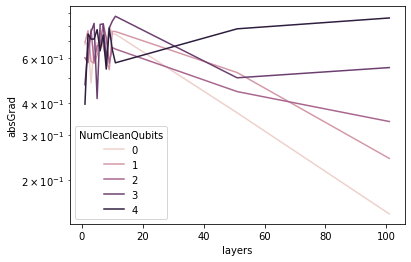

In [27]:
g = sns.lineplot(data=df, x="layers", y="absGrad", hue="NumCleanQubits", ci=None,estimator=np.mean)
g.set_yscale("log")